<div style="background-color:#EEB89F">
    <span style="font-size:40px"> Exploratory Data Analysis </span> 
    </br>
</div>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
train_path = "../favorita-grocery-sales-forecasting/train.csv"
test_path = "../favorita-grocery-sales-forecasting/test.csv"

In [3]:
X_train = pd.read_csv(train_path, parse_dates=['date'], date_parser=dateparse, low_memory=False)
X_test = pd.read_csv(test_path, parse_dates=['date'], date_parser=dateparse)

<div style="background-color:#9FC6E5">
    <span style="font-size:25px"> How many unique dates are in the data, what about records per date? </span>
</div>

In [4]:
unique_dates = len(X_train.sort_values(by=['date'])['date'].value_counts())
print(f"Number of unique dates in the data: {unique_dates}")

Number of unique dates in the data: 1684


In [5]:
date_records = pd.DataFrame(X_train.sort_values(by=['date'])['date'].value_counts(), columns=['date', 'records'])
date_records.reset_index(inplace=True)
columns = {'index':'date', 'date':'records', 'records':'None'}
date_records.rename(columns=columns, inplace=True)
date_records.drop('None', axis=1, inplace=True)

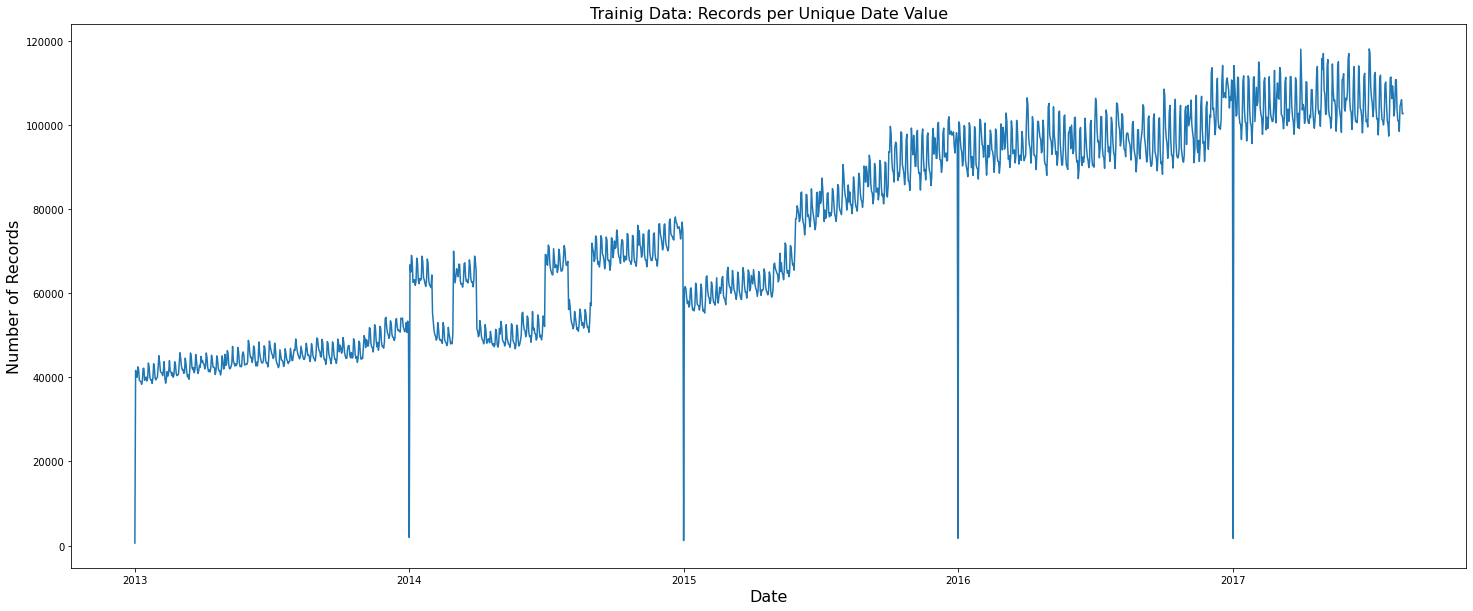

In [6]:
fig, ax = plt.subplots(figsize=(25, 10))
ax = sns.lineplot(x='date', y='records', data=date_records)
ax.set_title("Trainig Data: Records per Unique Date Value", fontsize=16)
ax.set_xlabel('Date', fontsize=16)
_=ax.set_ylabel('Number of Records', fontsize=16)

<div style="background-color:#EEB89F">
    <span style="font-size:40px"> COMMENTARY  </span> 
    </br>
    <span style="font-size:20px"> Plotting the number of records for each date shows a steady increase of records from 2013 to 2017, which could be based on several factors including (1) Better collection and (2) increases sales. Between 2014 and 2015, the number of records between dates is choppy, which again could be based on several factors including (1) missing data (2) some stores being closed or not reporting data as usual (3) lost records (4) or some other unidentified event. Finally, at the start of every year records fall to or close to zero, possibliy because the stores do not have much sales during New Years. </span>
</div>

<div style="background-color:#9FC6E5">
    <span style="font-size:25px"> How many records per year? </span>
</div>

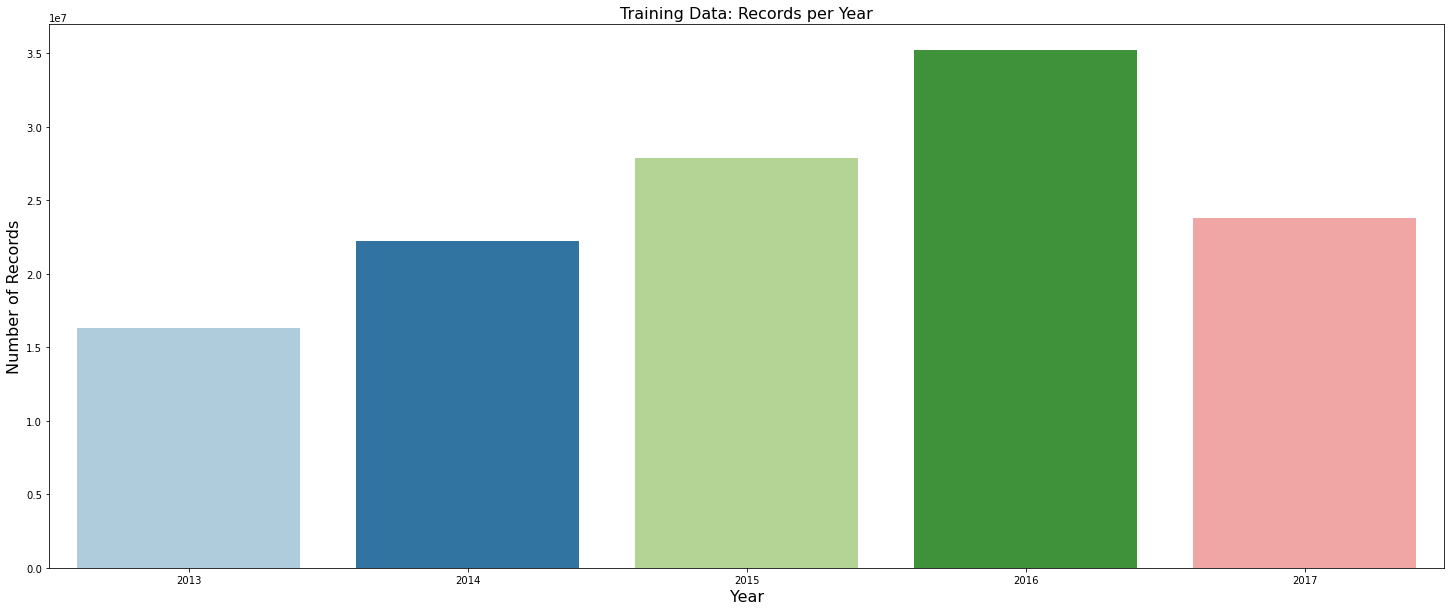

In [7]:
date_records['year'] = [ date.year for date in date_records['date']]
records_per_year = date_records.groupby(by="year")['records'].sum()
rpy = pd.DataFrame({"year": pd.DataFrame(records_per_year).index.values, "records": pd.DataFrame(records_per_year).records.values})
fig, ax = plt.subplots(figsize=(25, 10))
ax = sns.barplot(x='year', y='records', data=rpy, ax=ax, palette='Paired')
ax.set_title("Training Data: Records per Year", fontsize=16)
ax.set_xlabel('Year', fontsize=16)
_=ax.set_ylabel('Number of Records', fontsize=16)

<div style="background-color:#9FC6E5">
    <span style="font-size:25px"> How many records per month for each year? </span>
</div>

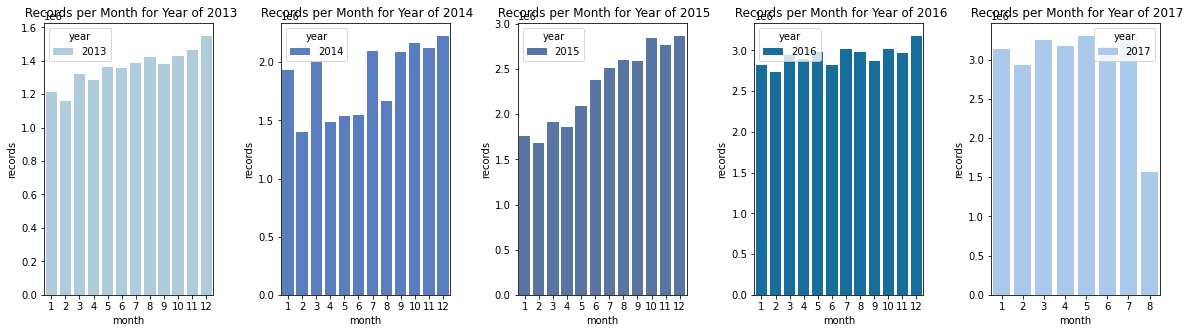

In [8]:
import numpy as np
date_records['month'] = [ date.month for date in date_records['date']]
records_per_year_month = date_records.groupby(by=["year", "month"])['records'].sum()
years = []
months = []
for y in records_per_year_month.index.values:
    years.append(y[0])
    months.append(y[1])
rpym = pd.DataFrame({"year": years, 
                     "month": months,
                     "records": pd.DataFrame(records_per_year_month).records.values})
palettes = ['Paired', 'muted', 'deep', 'colorblind', 'pastel']
fig, axs = plt.subplots(1,5, figsize=(20, 5))
fig.subplots_adjust(wspace=.4)
ax = axs.flatten()
unique_years = [2013,2014,2015,2016,2017]
for i, yr in enumerate(unique_years):
    tmp_df = rpym.loc[rpym.year==yr, :]
    ax[i] = sns.barplot(x="month", y ="records", hue="year", data=tmp_df, palette=palettes[i], ax=ax[i])
    ax[i].set_title(f" Records per Month for Year of {yr}")

<div style="background-color:#EEB89F">
    <span style="font-size:40px"> COMMENTARY  </span> 
    </br>
    <span style="font-size:20px"> Generally, it appears that the number of records (and probably sales) increase as the months progress. One can see 
    some gaps in 2014 though, which is consistent with the "Records per Unique Dates" plot from above. February looks like it has the least number of records and
    December has the most. </span>
</div>

<div style="background-color:#9FC6E5">
    <span style="font-size:25px">  What are the Min and Max Dates for train and test datasets? </span>
</div>

In [9]:
min_train_date = X_train.date.min()
max__train_date = X_train.date.max()
min_test_date = X_test.date.min()
max_test_date = X_test.date.max()
print(f"Min Train date: {min_train_date} , Max Train date {max__train_date}")
print(f"Min Test date: {min_test_date} , Max Test date {max_test_date}")

Min Train date: 2013-01-01 00:00:00 , Max Train date 2017-08-15 00:00:00
Min Test date: 2017-08-16 00:00:00 , Max Test date 2017-08-31 00:00:00


<div style="background-color:#EEB89F">
    <span style="font-size:40px"> COMMENTARY  </span> 
    </br>
    <span style="font-size:20px"> The above information indicates the test dataset will predict 15 days in the "future" </span>
</div>

<div style="background-color:#9FC6E5">
    <span style="font-size:25px"> What are the unit sales per year? </span>
</div>

In [10]:
X_train['year'] = [date.year for date in X_train['date']]

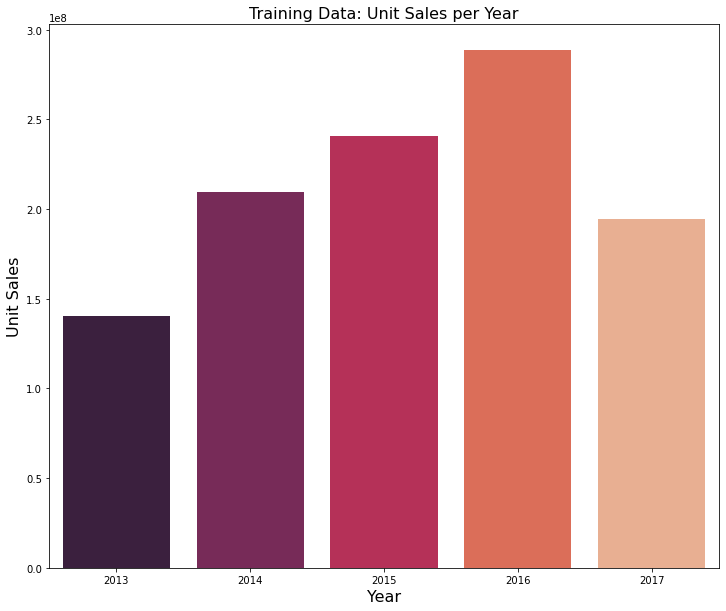

In [11]:
unitsales_per_year = X_train.groupby('year').unit_sales.sum()
upy = pd.DataFrame({"year": pd.DataFrame(unitsales_per_year).index.values, "sales": pd.DataFrame(unitsales_per_year).unit_sales.values})
fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.barplot(x='year', y='sales', data=upy, ax=ax, palette='rocket')
ax.set_title("Training Data: Unit Sales per Year", fontsize=16)
ax.set_xlabel('Year', fontsize=16)
_=ax.set_ylabel('Unit Sales', fontsize=16)

<div style="background-color:#9FC6E5">
    <span style="font-size:25px"> STORE DATA </span>
</div>

In [12]:
stores_path = "../favorita-grocery-sales-forecasting/stores.csv"
items_path = "../favorita-grocery-sales-forecasting/items.csv"
stores_df = pd.read_csv(stores_path)
items_df = pd.read_csv(items_path)

In [13]:
X_train_store_merged = X_train.merge(stores_df, how='inner', on='store_nbr')

<div style="background-color:#9FC6E5">
    <span style="font-size:25px"> How are the stores represented in the data with respect to number of records? </span>
</div>

In [14]:
number_of_unique_stores_training_data = len(X_train.store_nbr.unique())
number_of_unique_stores_testing_data = len(X_test.store_nbr.unique())
print(f"The training set has {number_of_unique_stores_training_data} unique stores")
print(f"The testing set has {number_of_unique_stores_testing_data} unique stores")

The training set has 54 unique stores
The testing set has 54 unique stores


<div style="background-color:#9FC6E5">
    <span style="font-size:25px"> How are the stores represented in the data with respect to number of records? </span>
</div>

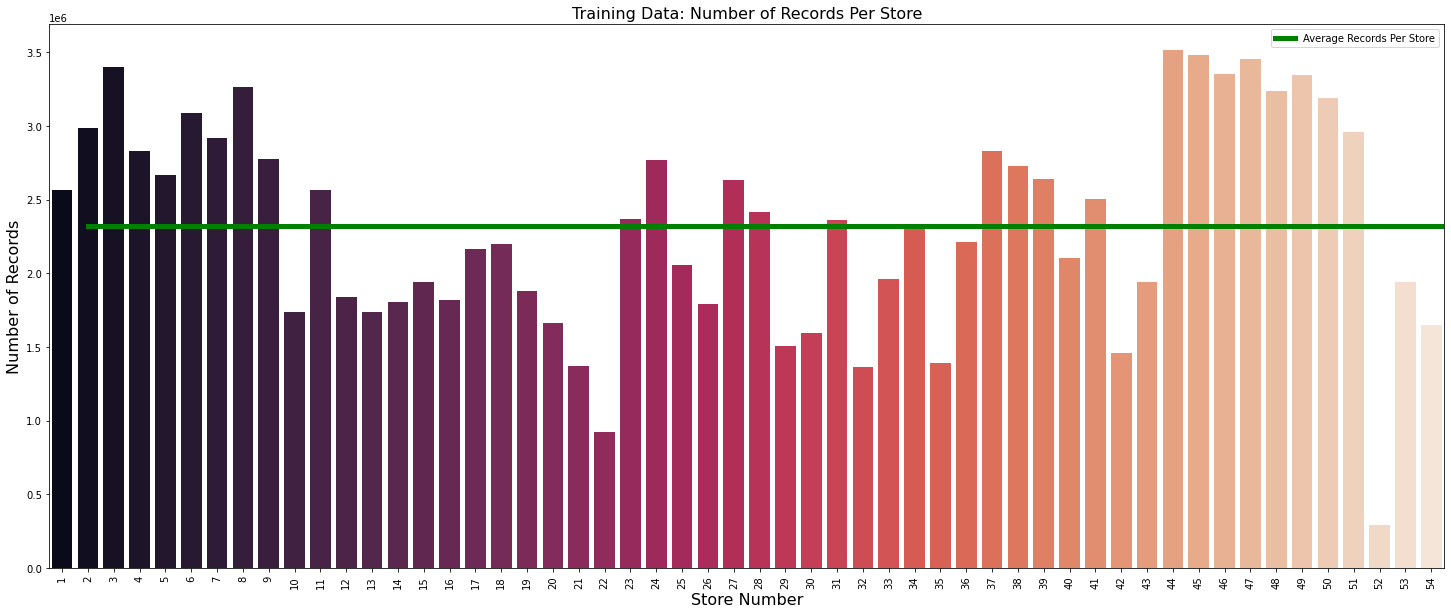

In [15]:
records_per_store = pd.DataFrame(X_train_store_merged['store_nbr'].value_counts())
records_per_store.reset_index(inplace=True)
records_per_store.rename(columns={'index':'store_nbr', 'store_nbr':'records'}, inplace=True)
avg = [round(records_per_store.records.mean())] * records_per_store.shape[0]
records_per_store['average'] = avg
fig, ax = plt.subplots(figsize=(25, 10))
ax = sns.lineplot(x='store_nbr', y='average', data=records_per_store, linewidth=5, ax=ax, color='green', label="Average Records Per Store")
ax = sns.barplot(x='store_nbr', y='records', data=records_per_store, ax=ax, palette='rocket')
ax.set_title("Training Data: Number of Records Per Store", fontsize=16)
ax.set_xlabel('Store Number', fontsize=16)
_=ax.set_ylabel('Number of Records', fontsize=16)
_=plt.xticks(rotation=90)

<div style="background-color:#EEB89F">
    <span style="font-size:40px"> COMMENTARY  </span> 
    </br>
    <span style="font-size:20px"> Stores with lower numbers (1-8) and higher numbers (44-51) have the most records in the the data. 
                                  Store 45 has the most and store 52 has very little. It would be interesting to look at when the stores pop up based on                                       year. For example, is store 52 not represented much in the data bcs it just opened in 2017?  This leads to other questions                                   such as impact on forecasts given the opening of a new store. </span>
</div>

<div style="background-color:#9FC6E5">
    <span style="font-size:25px"> How are stores represented by year? </span>
</div>

In [16]:
X_train_store_merged['year'] = [date.year for date in X_train_store_merged['date']]

In [17]:
stores_in_year = X_train_store_merged.groupby(by=["year", "store_nbr"]).count()

In [18]:
siy = stores_in_year['id']
columns={"id":"records"}
siy_df = pd.DataFrame(siy).reset_index()
siy_df.rename(columns=columns, inplace=True)

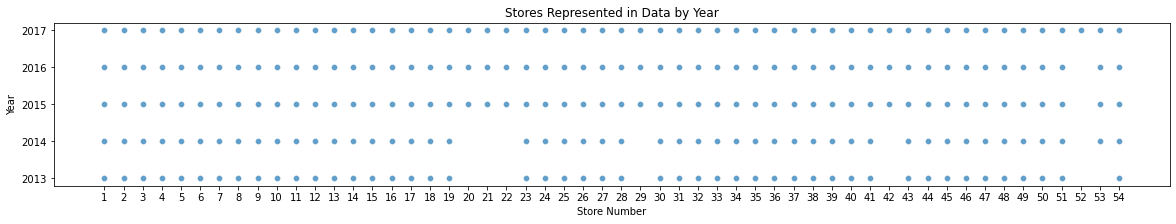

In [19]:
fig, ax = plt.subplots(figsize=(20,3))
ax = sns.scatterplot(x='store_nbr', y='year', markers="*", data=siy_df, ax=ax, alpha=0.7)
_=ax.set_xticks(list(range(1,55)))
_=ax.set_yticks(list(range(2013, 2018,1)))
_=ax.set_title("Stores Represented in Data by Year")
_=ax.set_xlabel("Store Number")
_=ax.set_ylabel("Year")

<div style="background-color:#EEB89F">
    <span style="font-size:40px"> COMMENTARY  </span> 
    </br>
    <span style="font-size:20px">As suspected, store 52 indeed appears to have been opened up in 2017. Store 53 was opened in 2014, and
                                 stores 20-22, 29, an 42 were opened in 2015, suggesting a year of growth. These additional stores may help
                                 explain why we see the number of records increasing as highlighted in the dates_eda notebook. A follow
                                 on question is the number of unit sales per store.</span>
</div>

<div style="background-color:#9FC6E5">
    <span style="font-size:25px"> What are the total unit sales per store from 2013 to 2017? </span>
</div>

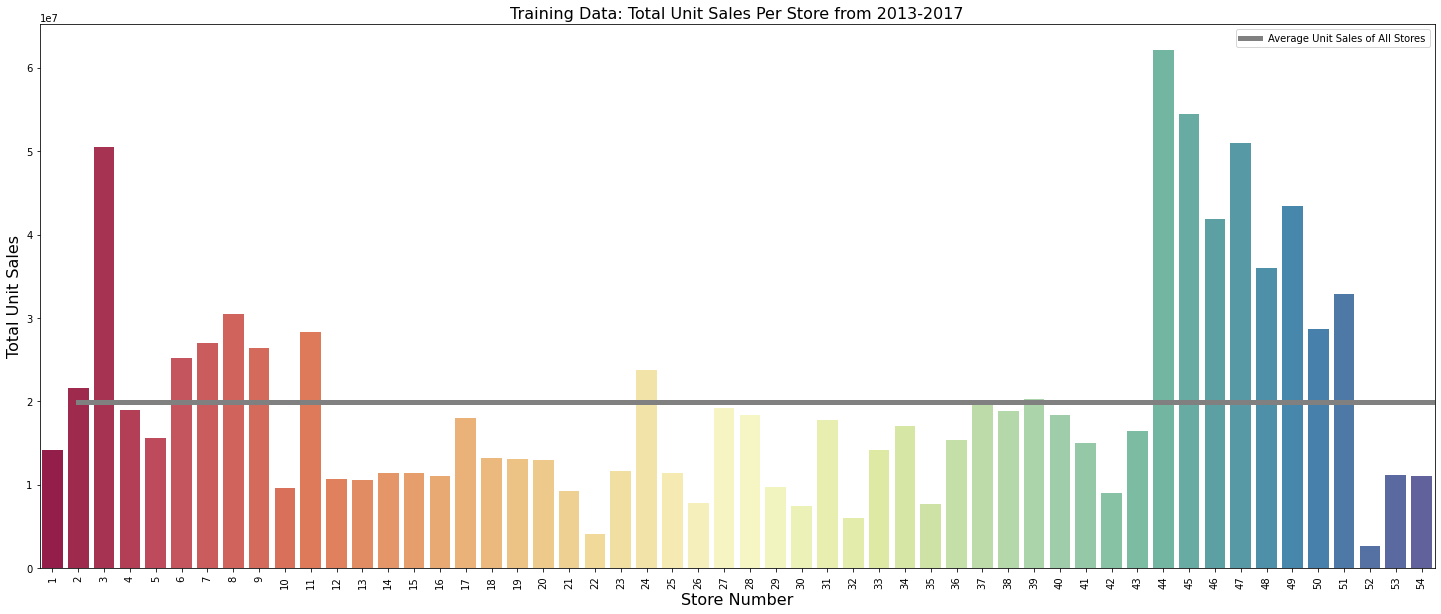

In [20]:
unitsales_per_store = pd.DataFrame(X_train_store_merged.groupby('store_nbr')['unit_sales'].sum())
unitsales_per_store.reset_index(inplace=True)
avg = [round(unitsales_per_store.unit_sales.mean())] * unitsales_per_store.shape[0]
unitsales_per_store['average'] = avg
fig, ax = plt.subplots(figsize=(25, 10))
ax = sns.lineplot(x='store_nbr', y='average', data=unitsales_per_store, linewidth=5, ax=ax, color='grey', label="Average Unit Sales of All Stores")
ax = sns.barplot(x='store_nbr', y='unit_sales', data=unitsales_per_store, ax=ax, palette='Spectral')
ax.set_title("Training Data: Total Unit Sales Per Store from 2013-2017", fontsize=16)
ax.set_xlabel('Store Number', fontsize=16)
_=ax.set_ylabel('Total Unit Sales', fontsize=16)
_=plt.xticks(rotation=90)

<div style="background-color:#EEB89F">
    <span style="font-size:40px"> COMMENTARY  </span> 
    </br>
    <span style="font-size:20px">Generally, stores that have the most records also have the most unit sales. The plot shows that store 3 and 44-49 are
                                 clear winners for most unit sales.  Store 22--which opened in 2014--does not have a lot sales and may signal    unspecified problems after its startup. Store 52 also has little sales but it opened in 2017.  When considering the average sales line in the plot, it would be interesting to look at this metric on an annual basis. In some ways, this can serve as a very simple baseline model in predicting unit sales for the next year </span>
</div>